In [5]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



In [7]:


df = pd.read_csv("/content/heart.csv")


In [8]:
#IT24102626 Handeling missing values

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Shape: (1025, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53   

In [9]:
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


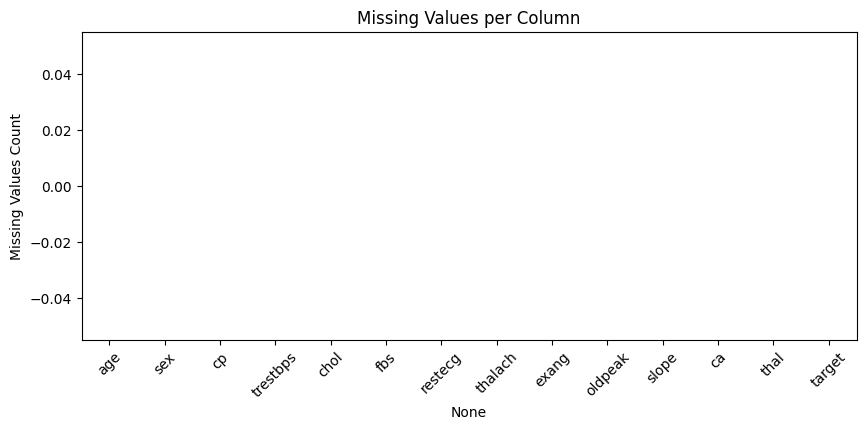

In [10]:
# Plot missing values count
plt.figure(figsize=(10, 4))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values per Column")
plt.show()

In [11]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
target = "target"

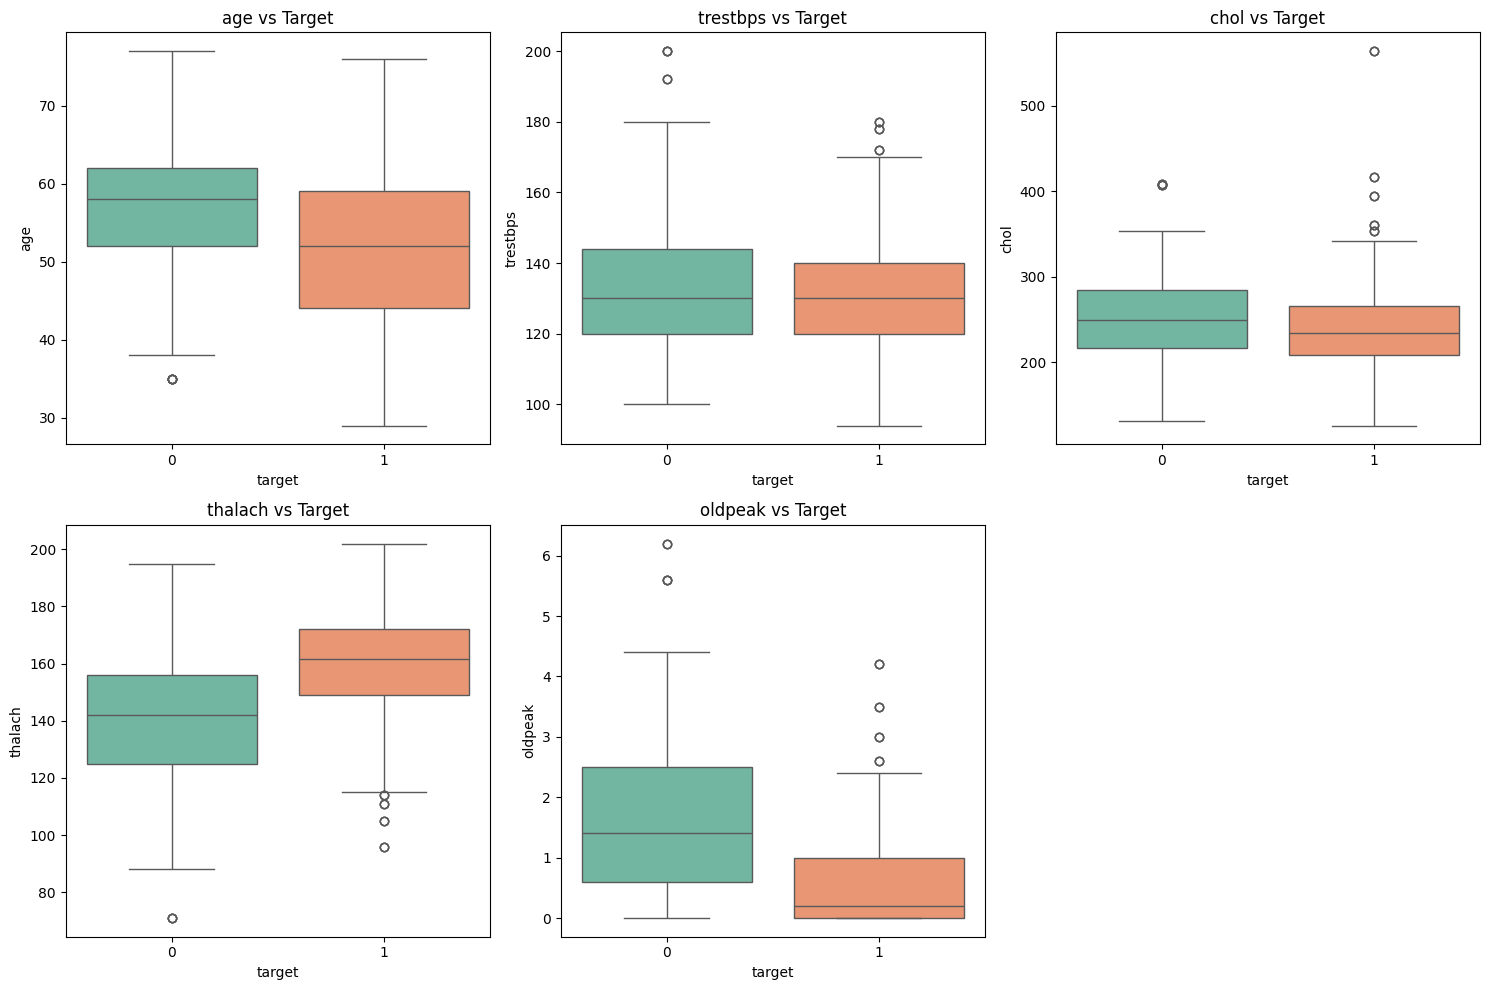

In [12]:
# Numeric variables vs Target (Boxplots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target, y=col, data=df, hue=target, palette="Set2", dodge=False, legend=False)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

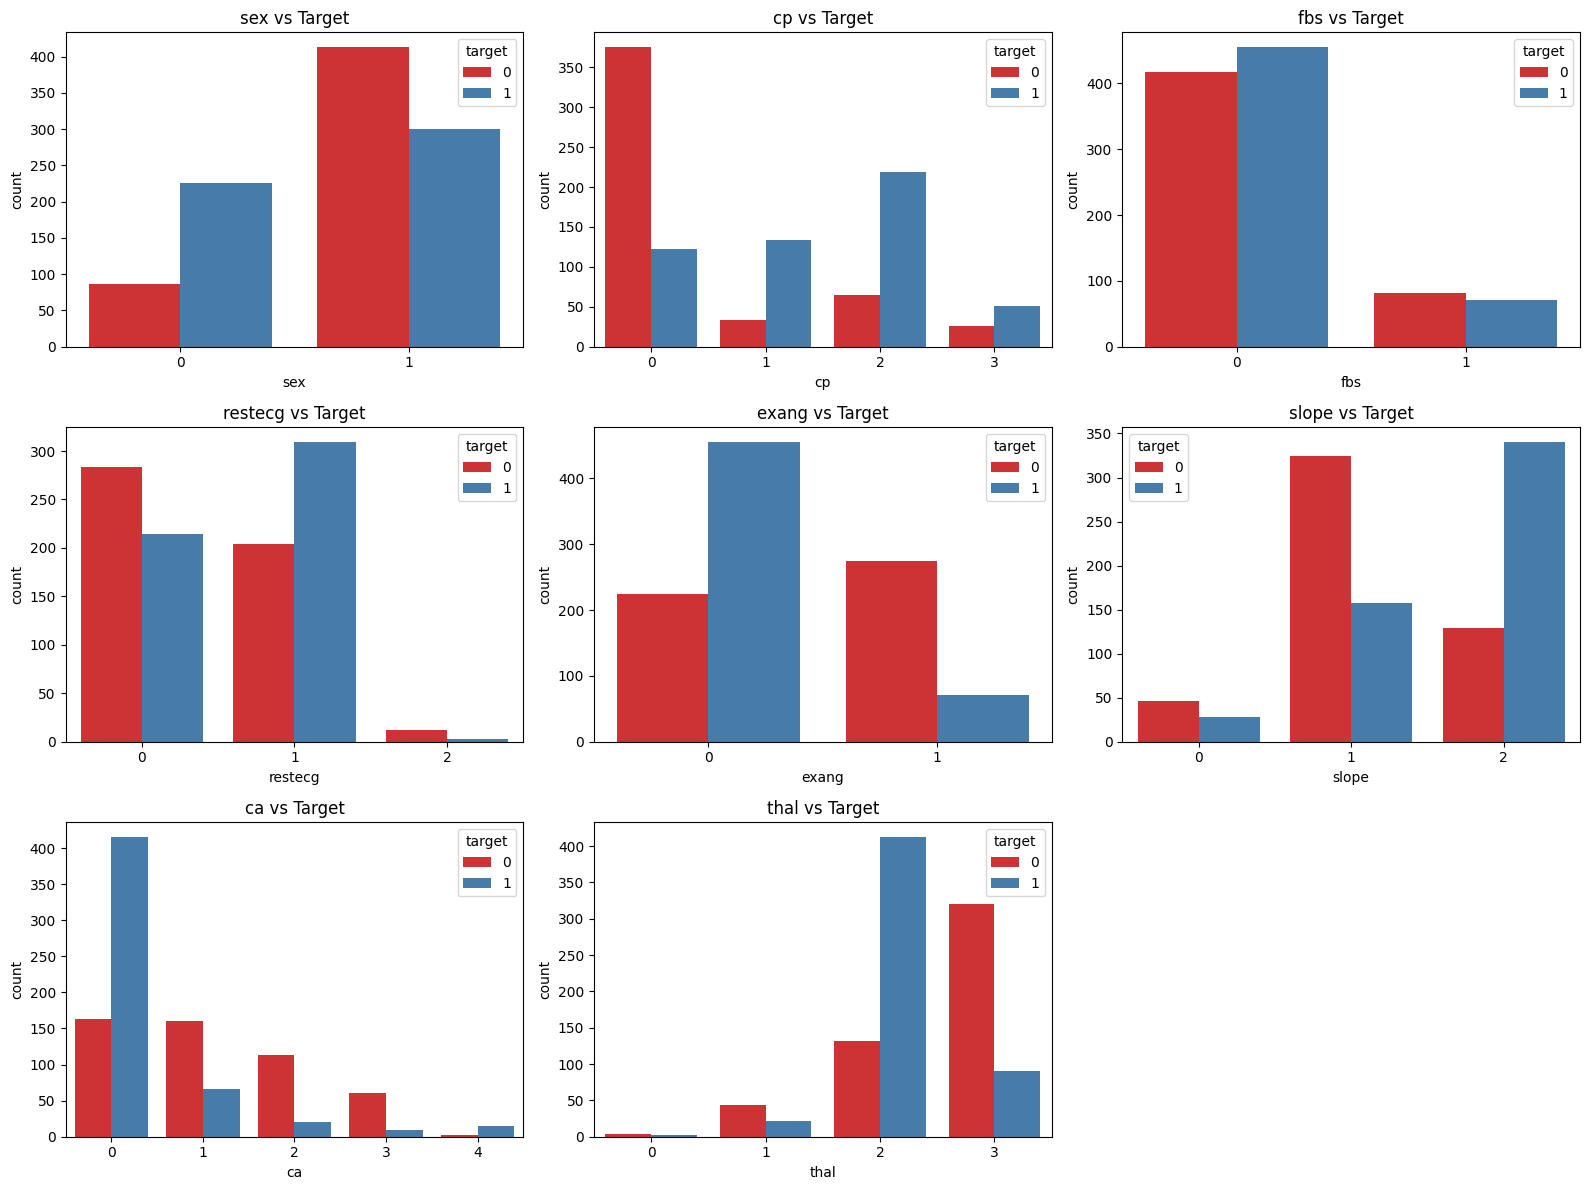

In [13]:
#  Categorical variables vs Target (Countplots)

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=target, data=df, palette="Set1")
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

In [14]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.

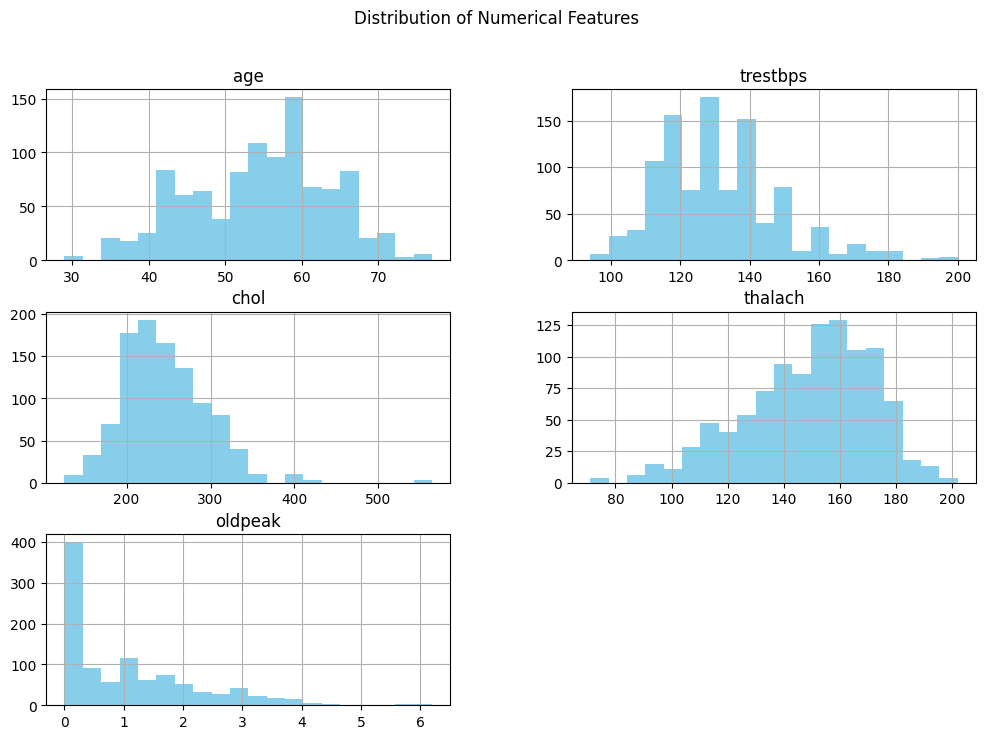

In [15]:
# Distribution plots for numerical features
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
df[num_cols].hist(bins=20, figsize=(12, 8), color="skyblue")
plt.suptitle("Distribution of Numerical Features")
plt.show()

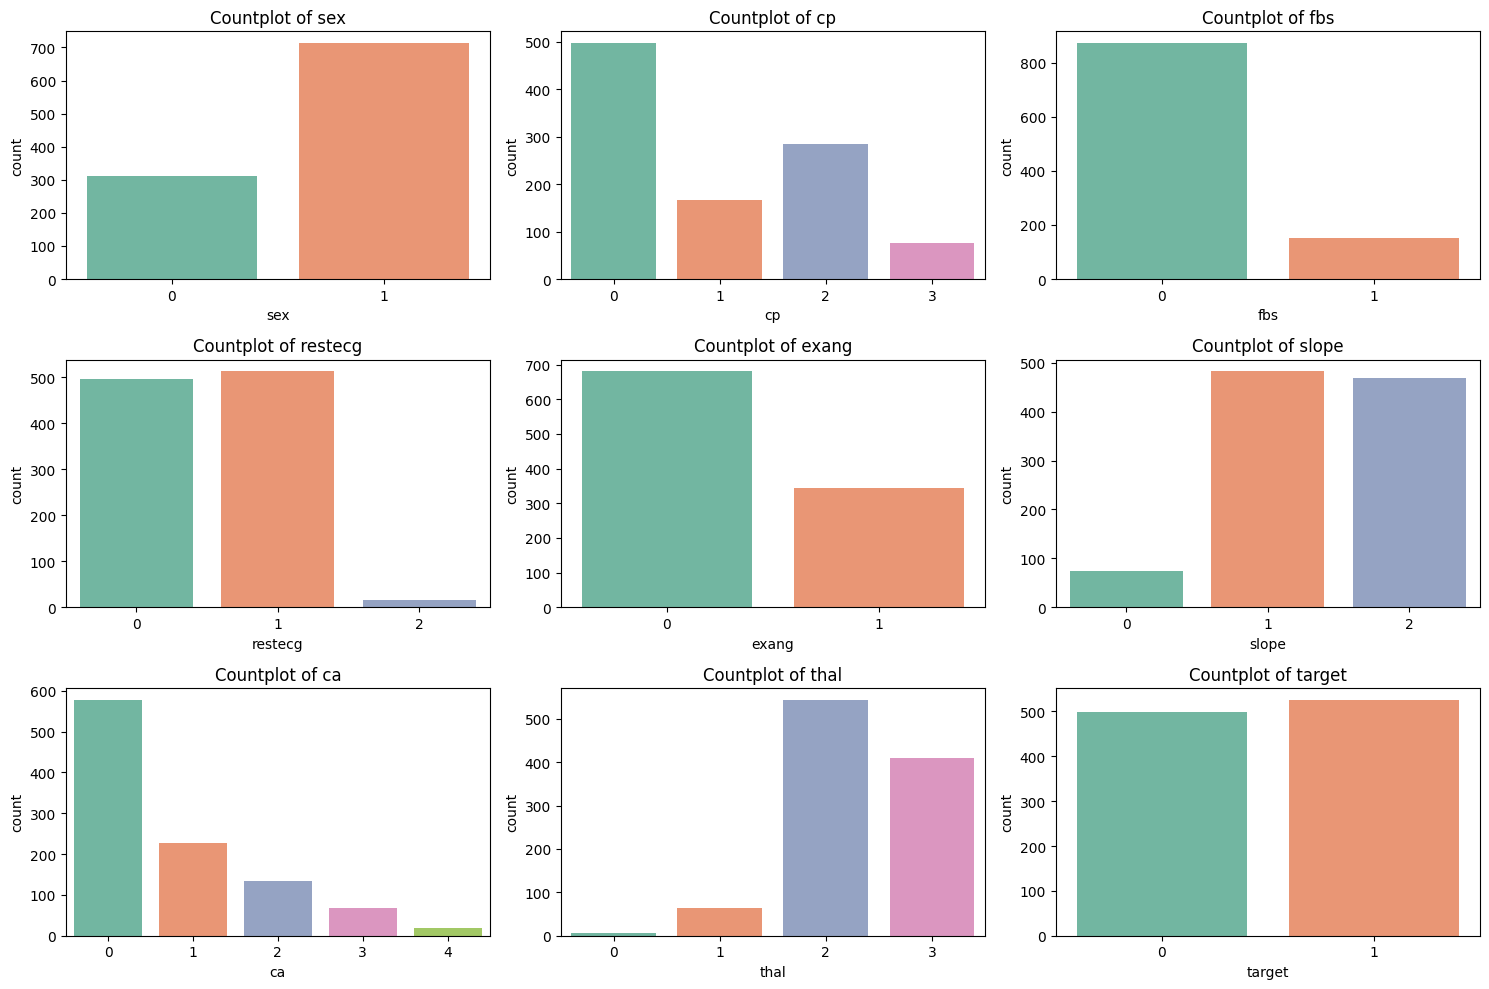

In [16]:
# Count plots for categorical features
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)  # fixed
    plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()


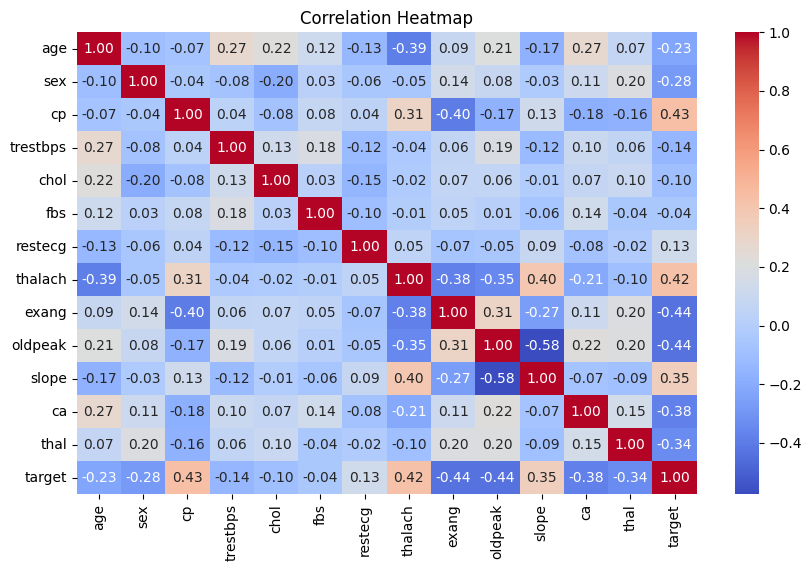

In [17]:
  # Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#IT24102635 Remove Outliers

# Columns to handle outliers
outlier_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

#detect Outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

#  remove Outliers
df_iqr = df.copy()
for col in outlier_cols:
    low, high = detect_outliers_iqr(df_iqr, col)
    df_iqr = df_iqr[(df_iqr[col] >= low) & (df_iqr[col] <= high)]

print(" Shape after IQR removal:", df_iqr.shape)

#  Winsorization
df_winsor = df.copy()
for col in outlier_cols:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.05, 0.05])  # cap bottom/top 5%

print(" Shape after Winsorization:", df_winsor.shape)

 Shape after IQR removal: (964, 14)
 Shape after Winsorization: (1025, 14)


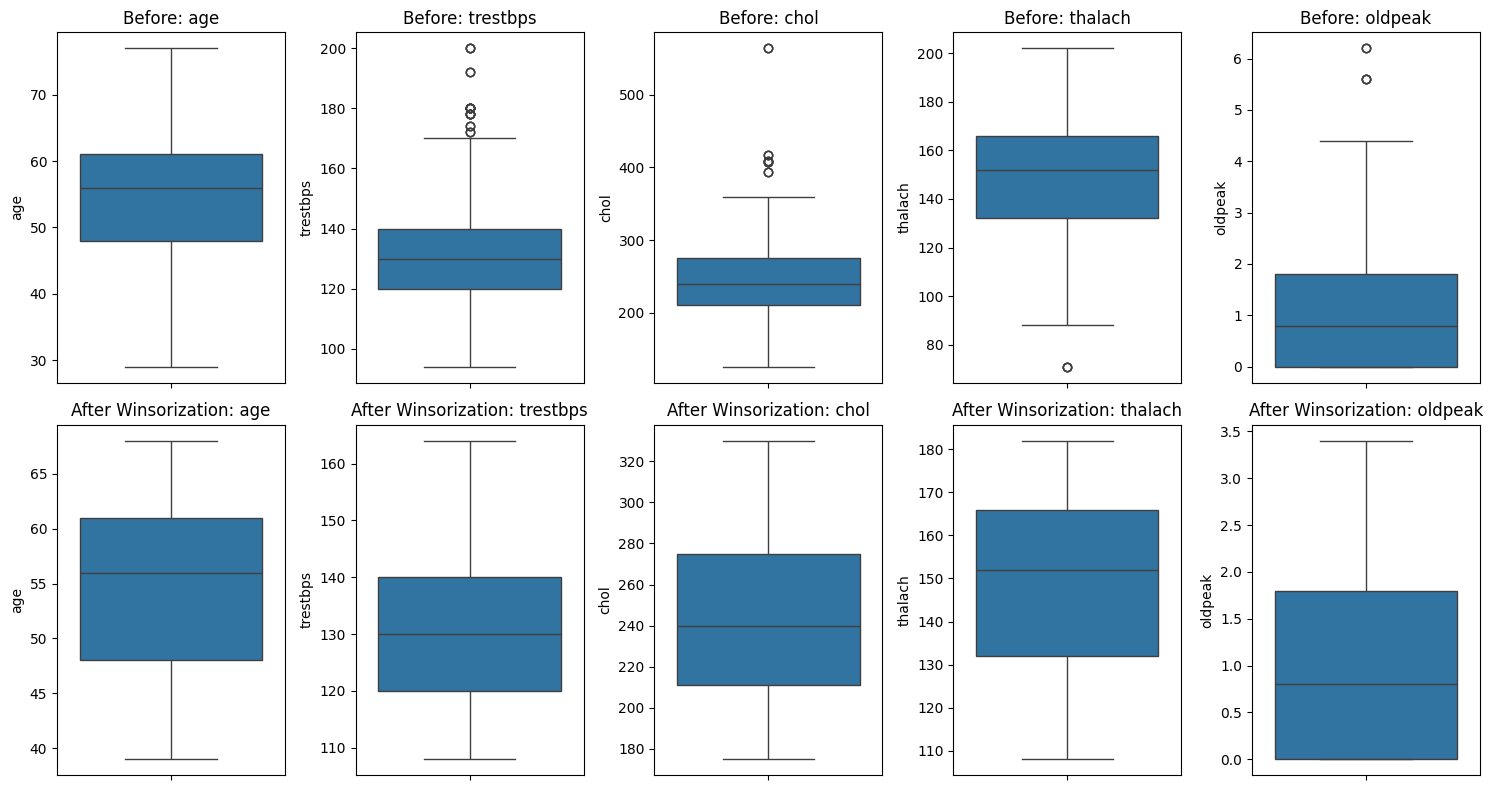

In [19]:
#Visulization
plt.figure(figsize=(15,8))

for i, col in enumerate(outlier_cols, 1):
    # Before
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f"Before: {col}")

    # After Winsorization
    plt.subplot(2, 5, i+5)
    sns.boxplot(y=df_winsor[col])
    plt.title(f"After Winsorization: {col}")

plt.tight_layout()
plt.show()


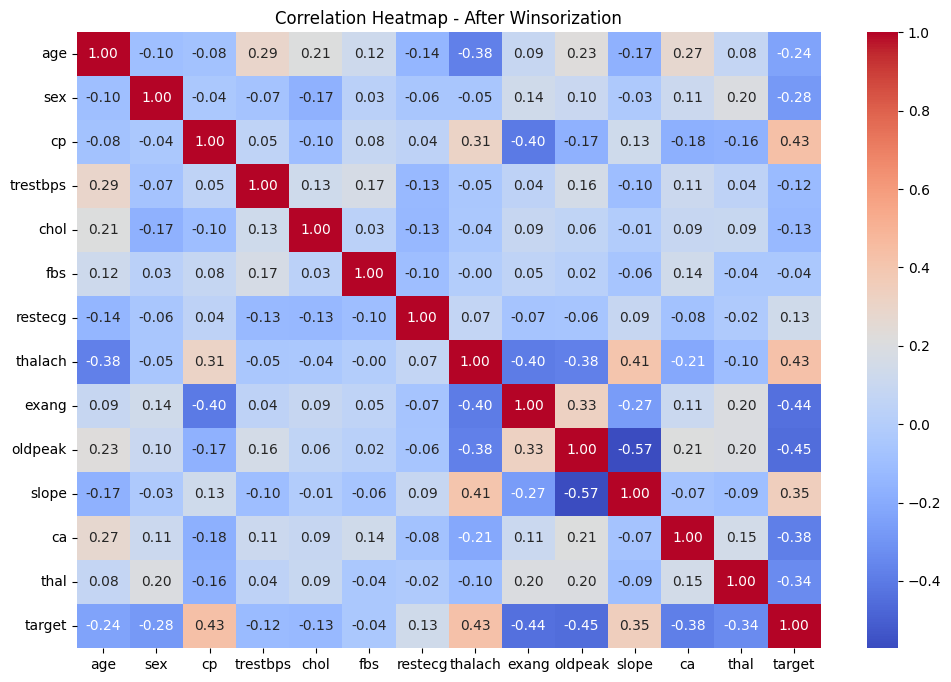

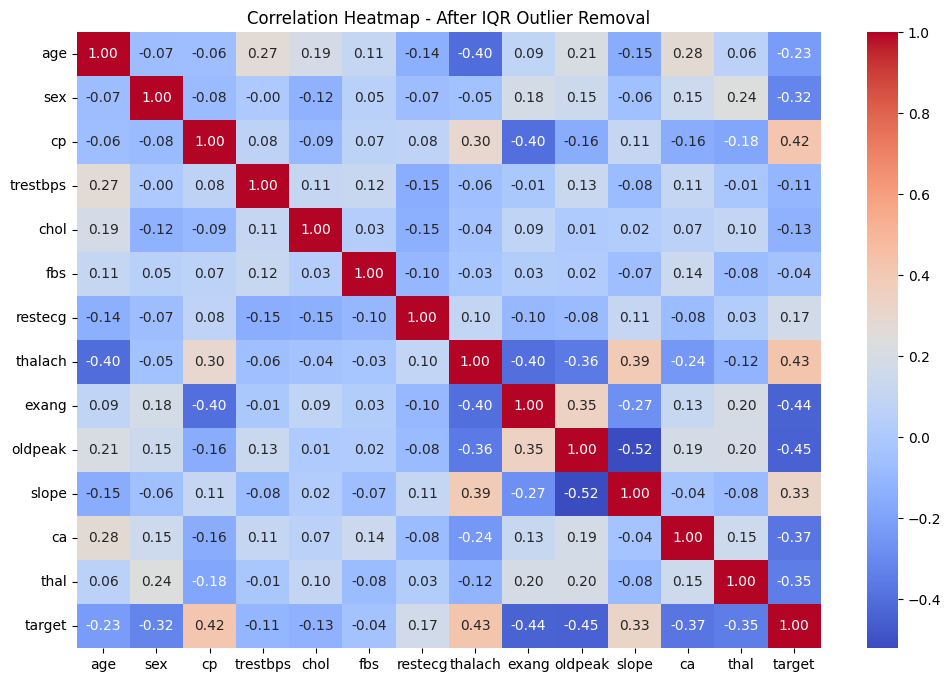

In [20]:
# Heatmap after Winsorization (outliers capped)
plt.figure(figsize=(12,8))
sns.heatmap(df_winsor.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - After Winsorization")
plt.show()

#  Heatmap after IQR removal (outliers removed)
plt.figure(figsize=(12,8))
sns.heatmap(df_iqr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - After IQR Outlier Removal")
plt.show()

In [21]:
# Encoding Categorical Data IT24102569


# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le_cp = LabelEncoder()
le_slope = LabelEncoder()

# Apply LabelEncoder to 'cp' and 'slope'
df['cp_encoded'] = le_cp.fit_transform(df['cp'])
df['slope_encoded'] = le_slope.fit_transform(df['slope'])

# Print the names of new label-encoded columns
print("New Label Encoded Columns:", ['cp_encoded', 'slope_encoded'])

New Label Encoded Columns: ['cp_encoded', 'slope_encoded']


In [22]:
import pandas as pd

# One-Hot Encode 'restecg', 'ca', and 'thal'
df = pd.get_dummies(df, columns=['restecg', 'ca', 'thal'],
                            prefix=['restecg', 'ca', 'thal'],
                            drop_first=True)

# Show new encoded columns
print("New One-Hot Encoded Columns:", [col for col in df.columns if col.startswith("restecg_")
                or col.startswith("ca_")
                or col.startswith("thal_")])

New One-Hot Encoded Columns: ['restecg_1', 'restecg_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3']


In [23]:
# View the first five rows of all encoded columns

# Combine label-encoded and one-hot encoded columns
encoded_cols = ['cp_encoded', 'slope_encoded'] + \
               [col for col in df.columns if col.startswith("restecg_")
                or col.startswith("ca_")
                or col.startswith("thal_")]

# Display only the encoded columns
df[encoded_cols].head()

,cp_encoded,slope_encoded,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0,2,True,False,False,True,False,False,False,False,True
1,0,0,False,False,False,False,False,False,False,False,True
2,0,0,True,False,False,False,False,False,False,False,True
3,0,2,True,False,True,False,False,False,False,False,True
4,0,1,True,False,False,False,True,False,False,True,False


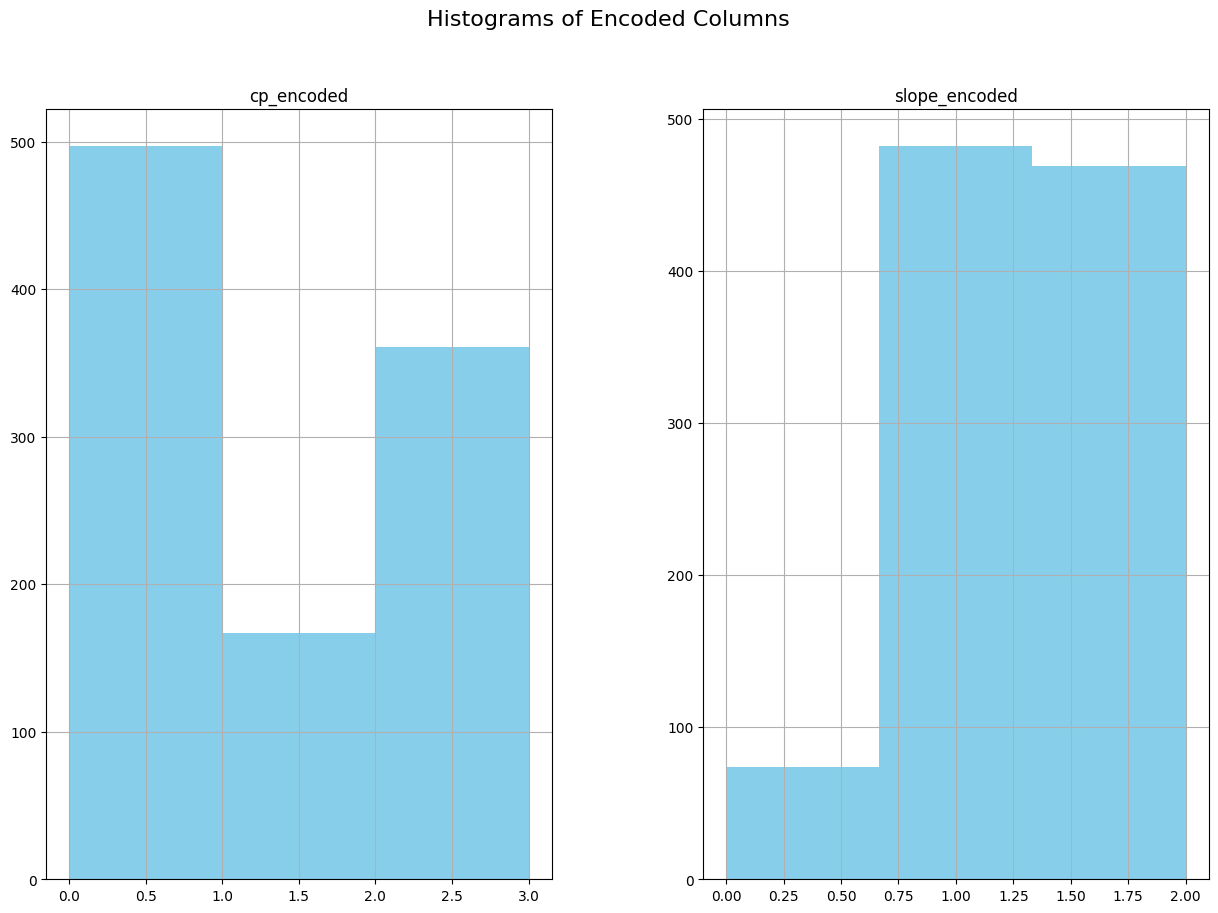

In [24]:
# Histograms
df[encoded_cols].hist(figsize=(15,10), bins=3, color='skyblue')
plt.suptitle("Histograms of Encoded Columns", fontsize=16)
plt.show()

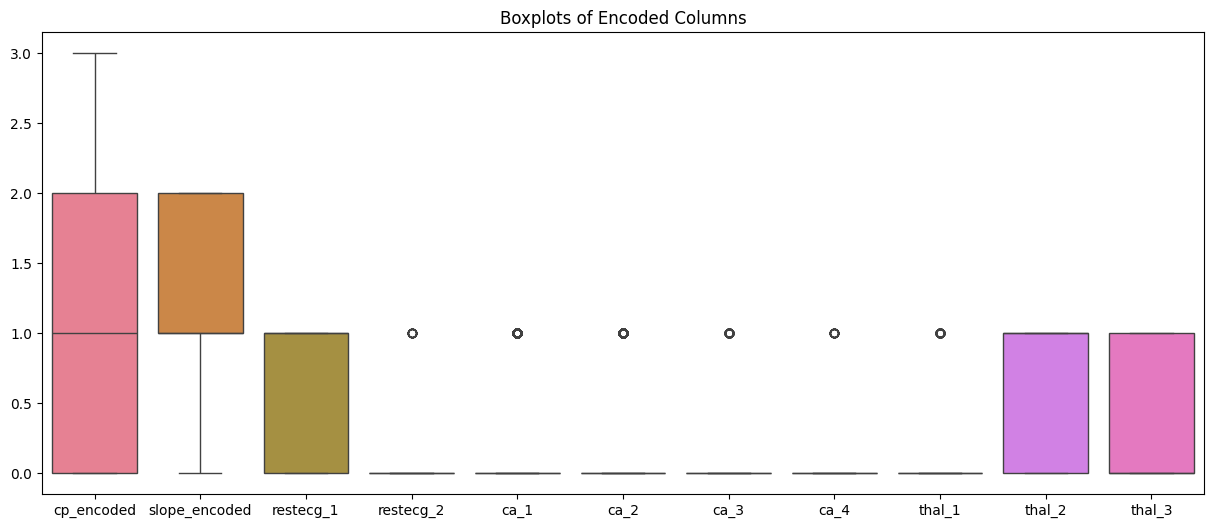

In [25]:
# Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(data=df[encoded_cols])
plt.title("Boxplots of Encoded Columns")
plt.show()

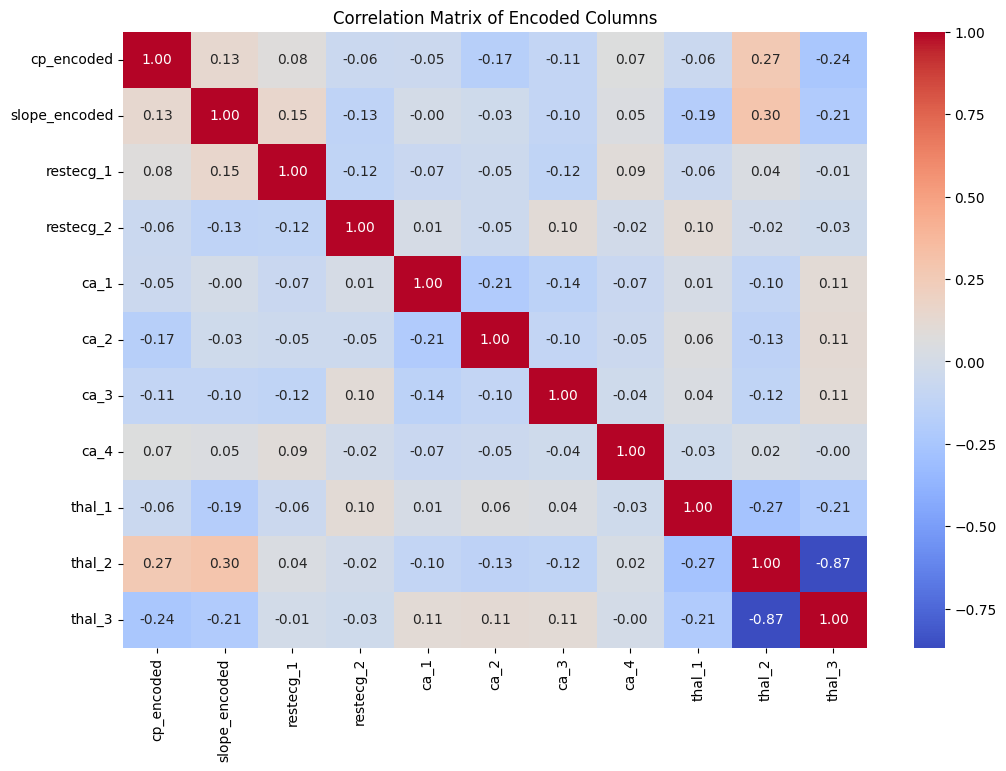

In [26]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[encoded_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Encoded Columns")
plt.show()

In [27]:
# IT24102609 Feature Selection

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Separate features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

print("Shape before Feature Selection:", X.shape)

Shape before Feature Selection: (1025, 21)


In [29]:
# 1. Correlation with target (Quick Filter)

corr_with_target = df.corr()["target"].sort_values(ascending=False)
print("\nCorrelation of features with target:\n", corr_with_target)


Correlation of features with target:
 target           1.000000
thal_2           0.519543
cp_encoded       0.434854
cp               0.434854
thalach          0.422895
slope_encoded    0.345512
slope            0.345512
restecg_1        0.178573
ca_4             0.085639
fbs             -0.041164
restecg_2       -0.076357
thal_1          -0.095541
chol            -0.099966
trestbps        -0.138772
ca_3            -0.205720
age             -0.229324
ca_1            -0.235299
ca_2            -0.276566
sex             -0.279501
exang           -0.438029
oldpeak         -0.438441
thal_3          -0.479709
Name: target, dtype: float64


In [30]:
# 2. SelectKBest (Chi-square test)

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

X = df.drop("target", axis=1)
y = df["target"]

# ANOVA F-test (works with negative values)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features (ANOVA F-test):", selected_features)


Selected features (ANOVA F-test): Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'cp_encoded',
       'slope_encoded', 'thal_2', 'thal_3'],
      dtype='object')


In [31]:
# 3. Model-based Feature Importance (RandomForest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature importance from RandomForest:")
print(importances)


Feature importance from RandomForest:
          Feature  Importance
6         thalach    0.110166
8         oldpeak    0.105266
2              cp    0.103678
19         thal_2    0.086327
0             age    0.084085
10     cp_encoded    0.082509
4            chol    0.079462
3        trestbps    0.068099
20         thal_3    0.053698
7           exang    0.037923
14           ca_1    0.037268
9           slope    0.029580
11  slope_encoded    0.028744
1             sex    0.027953
15           ca_2    0.020848
12      restecg_1    0.017589
16           ca_3    0.010430
5             fbs    0.009671
18         thal_1    0.005401
17           ca_4    0.001014
13      restecg_2    0.000289


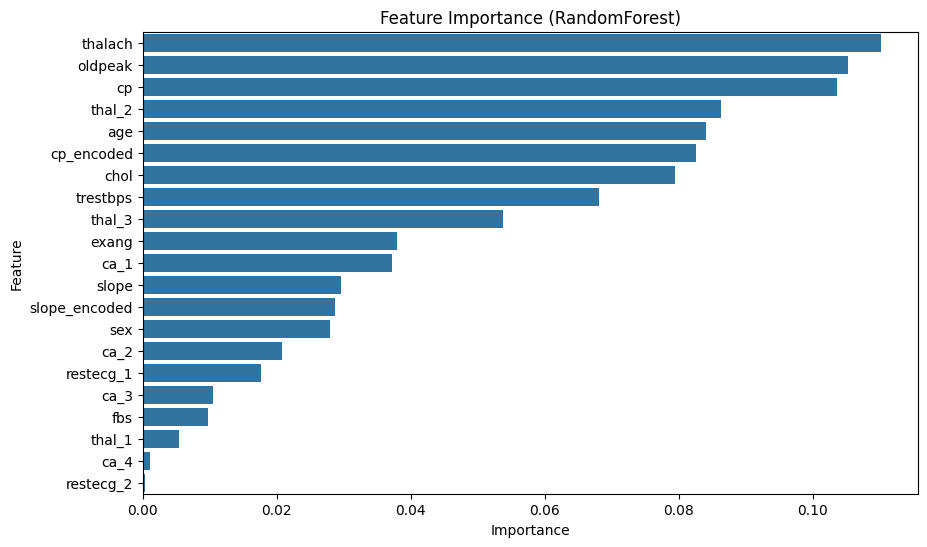

In [32]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importance (RandomForest)")
plt.show()

In [35]:
# IT24102626 Class balanced check (Apply SMORT)
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split before applying SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {1: 421, 0: 399}
After SMOTE: {0: 421, 1: 421}


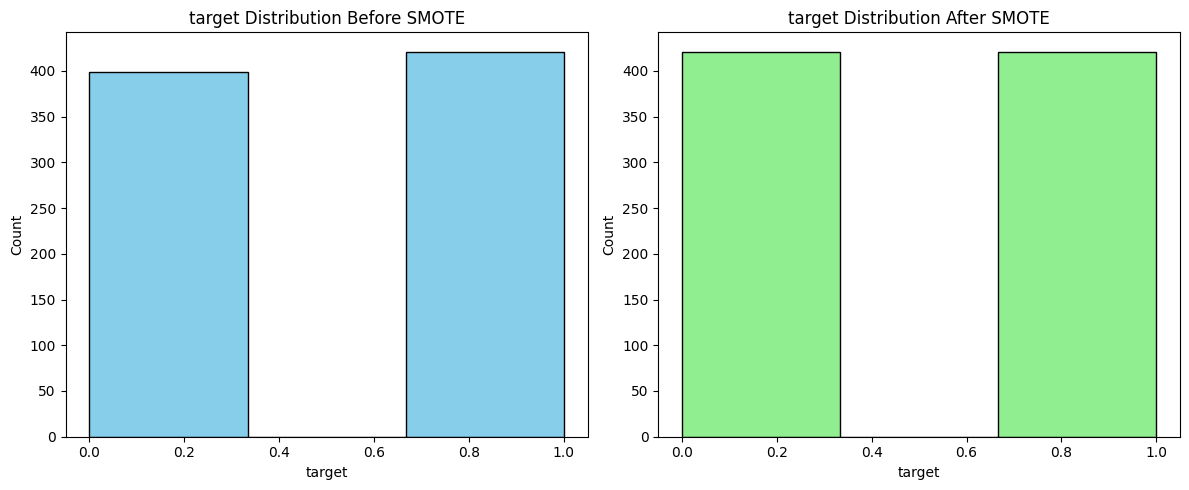

In [46]:
# Plot histogram of class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].hist(y_train, bins=3, color='skyblue', edgecolor='black')
axes[0].set_title("target Distribution Before SMOTE")
axes[0].set_xlabel("target")
axes[0].set_ylabel("Count")

# After SMOTE
axes[1].hist(y_train_res, bins=3, color='lightgreen', edgecolor='black')
axes[1].set_title("target Distribution After SMOTE")
axes[1].set_xlabel("target")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [37]:
#IT24102694 Scaling
from sklearn.preprocessing import StandardScaler

In [38]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Scale numeric features AFTER SMOTE
scaler = StandardScaler()
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # use same scaler

# Show scaled training data (first 5 rows of numeric columns)
pd.DataFrame(X_train_res, columns=X_train.columns)[numeric_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,0.805822,0.301785,0.894019,-1.914638,0.680548
1,0.143222,3.743108,0.776994,-0.715702,2.458384
2,0.253656,-0.253267,-0.373753,0.039184,-0.589335
3,0.253656,0.967847,-2.382685,1.060500,-0.758653
4,-0.298511,0.190774,-1.017392,0.882880,-0.843312


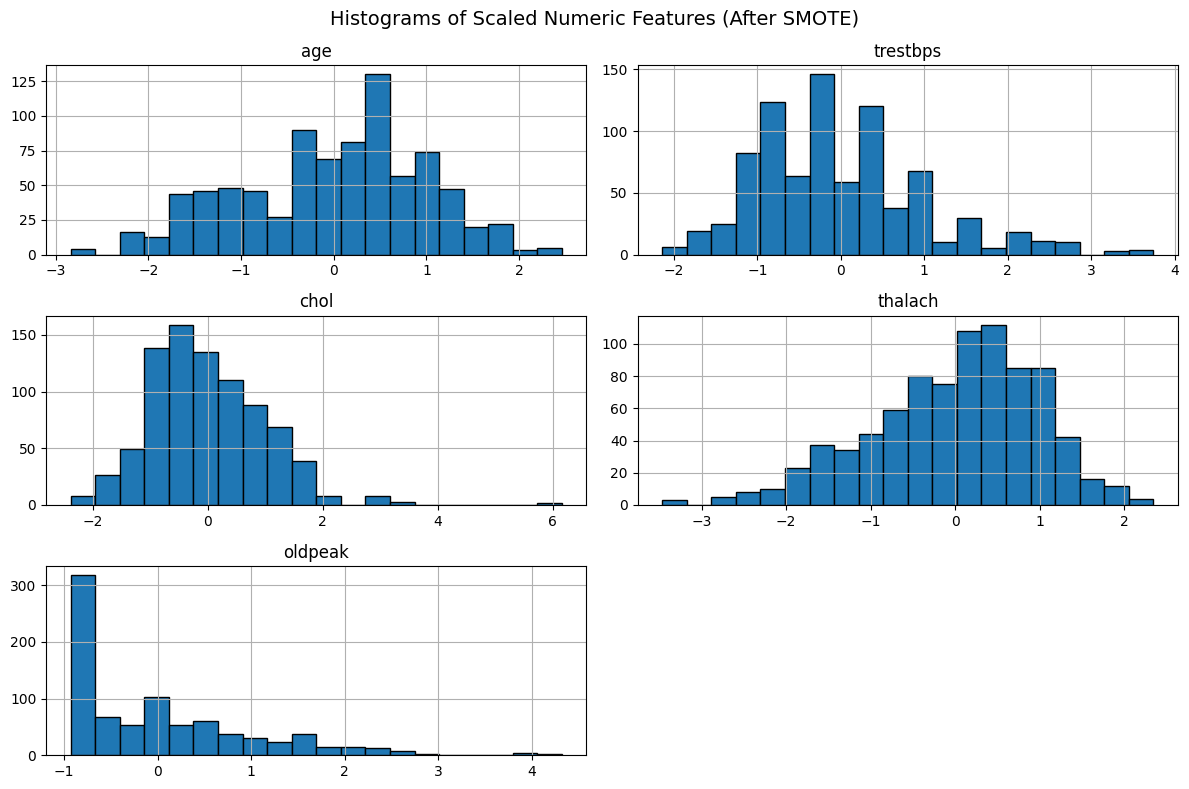

In [42]:
X_train_res_scaled = pd.DataFrame(X_train_res, columns=X_train.columns)

X_train_res_scaled[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Scaled Numeric Features (After SMOTE)", fontsize=14)
plt.tight_layout()
plt.show()


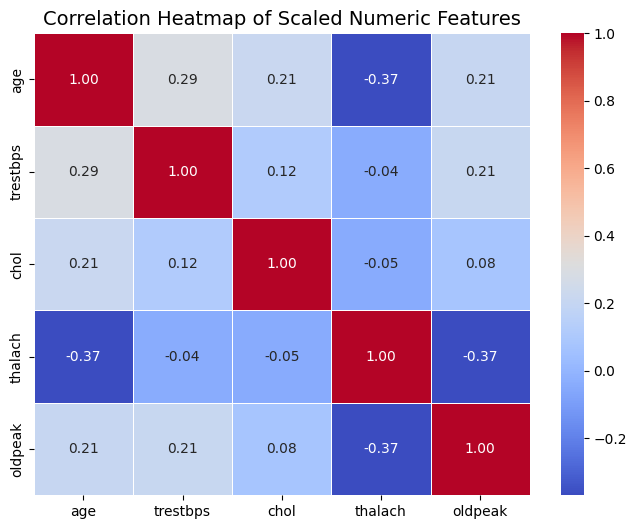

In [44]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
corr_matrix = X_train_res_scaled[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Scaled Numeric Features", fontsize=14)
plt.show()

In [49]:
# Define the features to use for PCA (using the selected features from SelectKBest as an example)

#  Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Apply PCA (keep 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Explained variance (to decide how many components to keep)
pca_full = PCA().fit(X_scaled)
print("Explained variance ratio:", pca_full.explained_variance_ratio_)
print("Cumulative explained variance:", pca_full.explained_variance_ratio_.cumsum())

Explained variance ratio: [1.98101057e-01 9.74313749e-02 8.41443270e-02 7.33561361e-02
 6.37985900e-02 5.74075800e-02 5.53762025e-02 4.71036753e-02
 4.52565903e-02 4.46122696e-02 3.93007178e-02 3.81377729e-02
 3.59115589e-02 3.23078933e-02 2.74961080e-02 2.36028702e-02
 1.93505315e-02 1.67331884e-02 5.71555876e-04 1.08748950e-17
 2.02615837e-19]
Cumulative explained variance: [0.19810106 0.29553243 0.37967676 0.4530329  0.51683149 0.57423907
 0.62961527 0.67671894 0.72197553 0.7665878  0.80588852 0.84402629
 0.87993785 0.91224575 0.93974185 0.96334472 0.98269526 0.99942844
 1.         1.         1.        ]


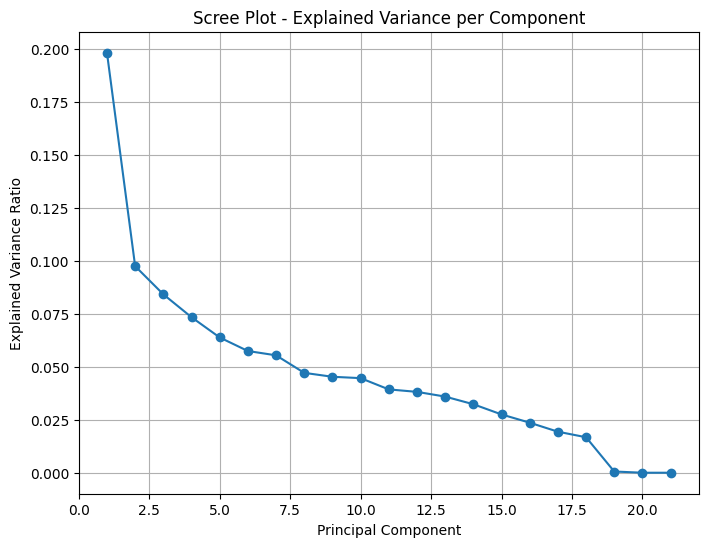

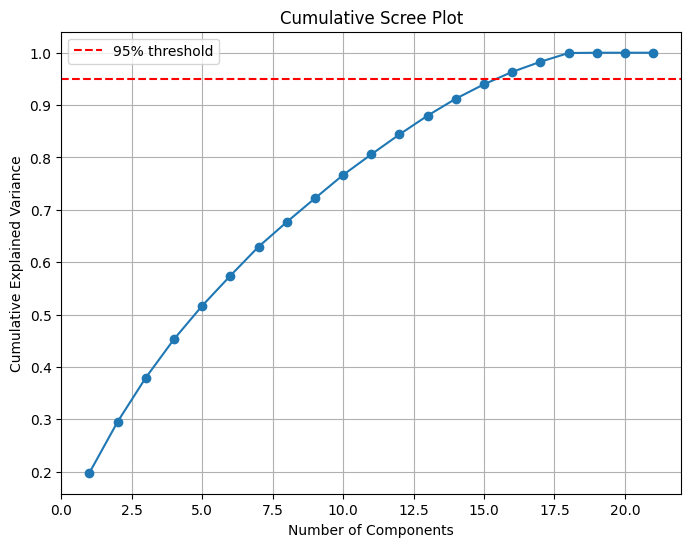

In [50]:

# Explained variance (per component)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot - Explained Variance per Component")
plt.grid(True)
plt.show()

# Cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Scree Plot")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
df.to_csv("/content/drive/MyDrive/preprocessed_heart_ dataset.csv", index=False)